In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import torch

/Users/markviti/opt/anaconda3/envs/data/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Problem 1
### A

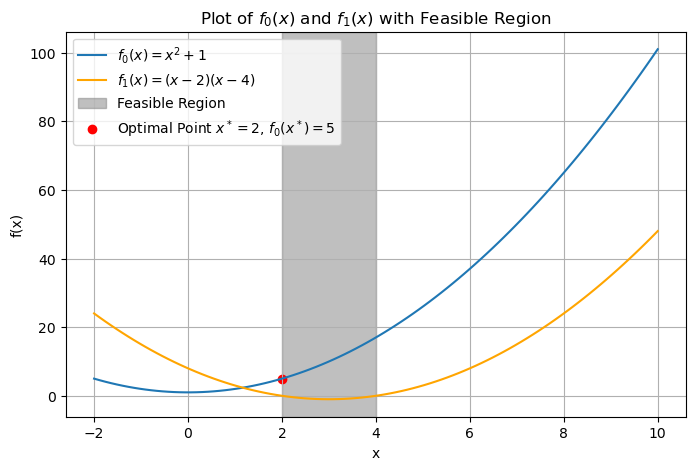

In [2]:
def f0(x):
    return x**2 + 1
def f1(x):
    return (x - 2)*(x - 4)

x = np.linspace(-2, 10, 100)
y0 = f0(x)
y1 = f1(x)

feasible_x = x[(x >= 2) & (x <= 4)]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y0, label='$f_0(x) = x^2 + 1$')
plt.plot(x, y1, label='$f_1(x) = (x-2)(x-4)$', color='orange')

# Highlight the region between 2 and 4
plt.axvspan(2, 4, color='grey', alpha=0.5, label='Feasible Region')

# Plot optimal point x = 2
plt.scatter(2, f0(2), color='red', label=f"Optimal Point $x^* = 2$, $f_0(x^*) = {f0(2)}$")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f_0(x)$ and $f_1(x)$ with Feasible Region')
plt.legend()
plt.grid(True)
plt.show()

### B
We will first write out the Lagrange dual. The Lagrange dual is given by
$\begin{align}
L(x, \lambda) & = (1 + \lambda)x^2 - 6\lambda x + (1 + 8 \lambda)
\end{align}$

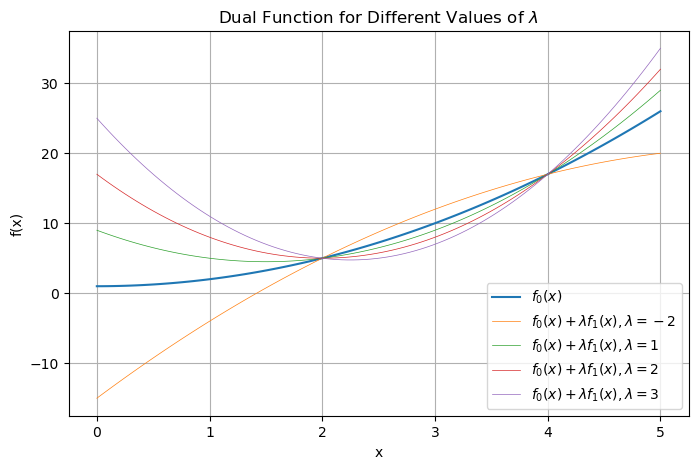

In [9]:
# Plot the dual for a few values of lambda
x = np.linspace(0, 5, 100)
lambdas = [-2, 1, 2, 3]
plt.figure(figsize=(8, 5))
plt.plot(x, f0(x), label='$f_0(x)$')
for l in lambdas:
    plt.plot(x, f0(x) + l*f1(x), label=f"$f_0(x) + λ f_1(x), λ = {l}$", linewidth=.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Dual Function for Different Values of $\lambda$')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
def LAD(y: torch.Tensor, x: torch.Tensor, beta: torch.Tensor) -> float:
    return torch.sum(torch.abs(y - x @ beta))

def gradient_descent(y: torch.Tensor, x: torch.Tensor, beta: torch.Tensor, alpha: float, max_iter: int, epsilon: float = 1e-8) -> torch.Tensor:
    beta = beta.clone()
    for i in range(max_iter):
        beta -= alpha * torch.sign(x.t() @ (x @ beta - y))
        if LAD(y, x, beta) < epsilon:
            break
    return beta

def LAD_gamma(y: torch.Tensor, x: torch.Tensor, beta: torch.Tensor, gamma: float) -> float:
    return torch.sum((1/gamma) * torch.log(torch.exp(gamma * (y - x @ beta)) + torch.exp(gamma * (x @ beta - y)))) 